# Introduction to Convolution Neural Networks

## Import the libraries

In [2]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
# Note: keras.utils only doesn't work. Change this to keras.utils.np_utils instead
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing
Our MNIST images only have a depth of 1. We must explicitly declare that.

In [5]:
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)



In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Creating, compiling and training the model

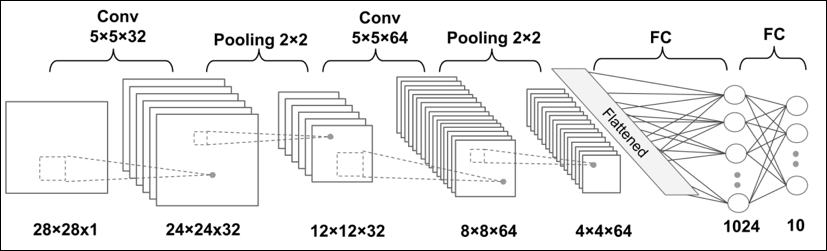

In [7]:
cnn = Sequential()

In [9]:
# Convolution layer:
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))

In [10]:
# Max Pooling layer:
cnn.add(MaxPooling2D())

In [11]:
# Another Convolution layer:
cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))

In [12]:
# Another Max Pooling layer:
cnn.add(MaxPooling2D())

In [13]:
# Flattening the network:
cnn.add(Flatten())

In [14]:
cnn.add(Dense(1024, activation='relu'))

In [15]:
# Fully-connected Output layer:
cnn.add(Dense(10, activation='softmax'))

In [16]:
# Compiling the model:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
# To confirm that model is correc:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

## Train the model

In [ ]:
#history_cnn = cnn.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_train, y_train))

In [ ]:
#plt.plot(history_cnn.history_cnn['accuracy'])
#plt.plot(history_cnn.history_cnn['val_accuracy'])

In [18]:
# alternative way to load the weights: just use the weights that have already been trained by the instructor
cnn.load_weights('weights/cnn-model5.h5')

## Accuracy of the model

In [19]:
score = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0268 - accuracy: 0.9930


In [20]:
score

[0.026782656088471413, 0.9929999709129333]